# Entry 34b notebook - Classification datasets

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import openml

## openml datasets

In [46]:
openml_opts = openml.datasets.list_datasets(output_format='dataframe')
openml_opts.head()

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
2,2,anneal,1,1,active,ARFF,684.0,7.0,8.0,5.0,39.0,898.0,898.0,22175.0,6.0,33.0
3,3,kr-vs-kp,1,1,active,ARFF,1669.0,3.0,1527.0,2.0,37.0,3196.0,0.0,0.0,0.0,37.0
4,4,labor,1,1,active,ARFF,37.0,3.0,20.0,2.0,17.0,57.0,56.0,326.0,8.0,9.0
5,5,arrhythmia,1,1,active,ARFF,245.0,13.0,2.0,13.0,280.0,452.0,384.0,408.0,206.0,74.0
6,6,letter,1,1,active,ARFF,813.0,26.0,734.0,26.0,17.0,20000.0,0.0,0.0,16.0,1.0


In [50]:
pd.set_option('display.max_rows', 325)
openml_opts[(openml_opts['NumberOfClasses'] == 2)
            & (openml_opts['NumberOfFeatures'] < 50)
            & (openml_opts['NumberOfFeatures'] > 10)
            & (openml_opts['NumberOfInstances'] > 1000)
            & (openml_opts['NumberOfFeatures'] < 1000000)
           ].sort_values('name')

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
727,727,2dplanes,2,2,active,ARFF,20420.0,2.0,20348.0,2.0,11.0,40768.0,0.0,0.0,10.0,1.0
1240,1240,AirlinesCodrnaAdult,1,1,active,ARFF,603138.0,293.0,473652.0,2.0,30.0,1076790.0,4085.0,7275.0,13.0,17.0
42256,42256,Asteroid_Dataset,2,10666,active,arff,125975.0,NaN,156.0,2.0,34.0,126131.0,96.0,99.0,32.0,1.0
42252,42252,Asteroid_Dataset,1,10666,active,arff,125975.0,NaN,156.0,2.0,34.0,126131.0,96.0,99.0,31.0,2.0
1205,1205,BNG(Australian),1,1,active,ARFF,573051.0,2.0,426949.0,2.0,15.0,1000000.0,0.0,0.0,14.0,1.0
1211,1211,BNG(SPECT),1,1,active,ARFF,791580.0,2.0,208420.0,2.0,23.0,1000000.0,0.0,0.0,0.0,23.0
1212,1212,BNG(SPECTF),1,1,active,ARFF,718700.0,2.0,281300.0,2.0,45.0,1000000.0,0.0,0.0,44.0,1.0
1182,1182,BNG(adult),1,1,active,ARFF,759864.0,41.0,240136.0,2.0,15.0,1000000.0,0.0,0.0,2.0,13.0
257,257,BNG(colic),1,1,active,ARFF,630221.0,6.0,369779.0,2.0,23.0,1000000.0,0.0,0.0,7.0,16.0
122,122,"BNG(colic,nominal,1000000)",1,1,active,ARFF,629653.0,6.0,370347.0,2.0,23.0,1000000.0,0.0,0.0,0.0,23.0


In [53]:
data = openml.datasets.get_dataset(1240).get_data()[0]
data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,codrna_X1,codrna_X2,codrna_X3,...,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,Delay
0,US,1558.0,PHX,CLT,3,15.0,222.0,0.698608,0.136363,0.281746,...,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,1
1,AA,2400.0,LAX,DFW,3,20.0,165.0,0.698608,0.136363,0.281746,...,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,1
2,AA,2466.0,SFO,DFW,3,20.0,195.0,0.698608,0.136363,0.281746,...,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,1
3,AS,108.0,ANC,SEA,3,30.0,202.0,0.698608,0.136363,0.281746,...,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,0
4,CO,1094.0,LAX,IAH,3,30.0,181.0,0.698608,0.136363,0.281746,...,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,1


## Seaborn datasets

In [2]:
sns.get_dataset_names()

//anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file //anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

## Iris

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

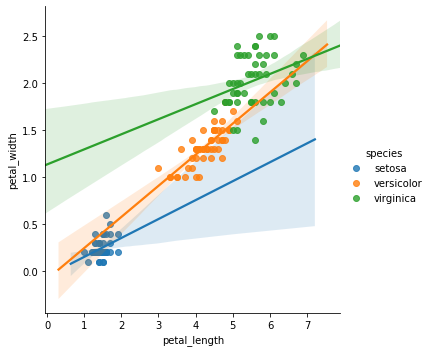

In [5]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue="species")

In [6]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
titanic['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

## Sklearn datasets

In [35]:
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer

In [14]:
iris_x = pd.DataFrame(load_iris()['data'], columns = load_iris()['feature_names'])
iris_y = load_iris()['target']

iris_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
set(iris_y)

{0, 1, 2}

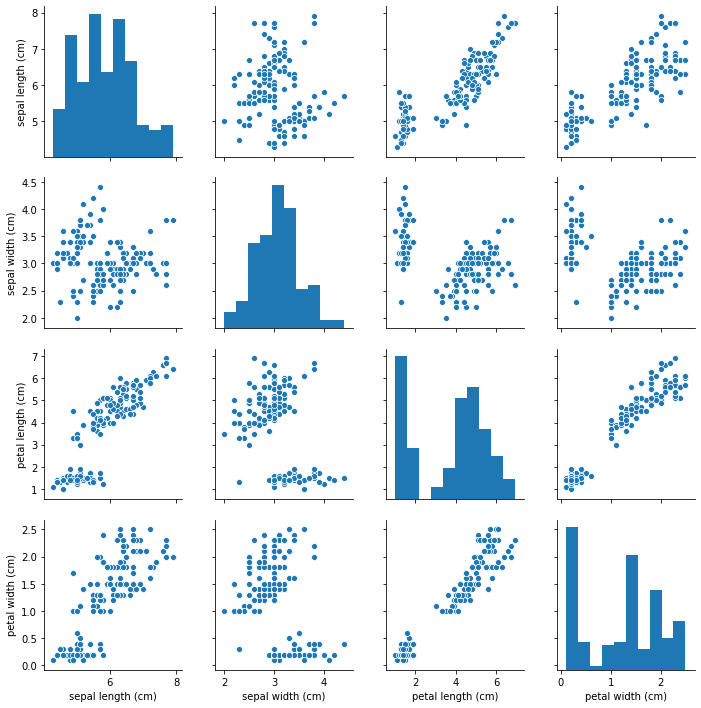

In [15]:
sns.pairplot(iris_x)

In [18]:
digits_x = pd.DataFrame(load_digits()['data'])
digits_y = load_digits()['target']

digits_x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [41]:
set(digits_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [21]:
wine_x = pd.DataFrame(load_wine()['data'], columns = load_wine()['feature_names'])
wine_y = load_wine()['target']

wine_x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [40]:
set(wine_y)

{0, 1, 2}

In [22]:
cancer_x = pd.DataFrame(load_breast_cancer()['data'], columns = load_breast_cancer()['feature_names'])
cancer_y = load_breast_cancer()['target']

cancer_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
set(cancer_y)

{0, 1}